In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [53]:
df.name.nunique()

305

In [54]:
df.drop("name",axis=1,inplace=True)

In [55]:
df.isnull().sum().any()

True

In [56]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [57]:
df.dropna(inplace=True) 

In [58]:
df.isnull().sum().any()

False

In [59]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [60]:
df["age"] = 2020 - (df["model_year"] +1900)

In [61]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [62]:
df.drop("model_year",axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    object 
 7   age           392 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [64]:
df["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [65]:
df = pd.get_dummies(df,drop_first=True)

In [66]:
df.sample(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
16,18.0,6,199.0,97.0,2774,15.5,50,0,1
141,29.0,4,98.0,83.0,2219,16.5,46,0,0
173,24.0,4,119.0,97.0,2545,17.0,45,1,0
364,26.6,8,350.0,105.0,3725,19.0,39,0,1
387,38.0,6,262.0,85.0,3015,17.0,38,0,1
312,37.2,4,86.0,65.0,2019,16.4,40,1,0
193,24.0,6,200.0,81.0,3012,17.6,44,0,1
100,18.0,6,250.0,88.0,3021,16.5,47,0,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [68]:
df.shape

(392, 9)

## Training a linear regression model

In [69]:
X = df.drop("mpg",axis=1)

In [70]:
X

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,38,0,1
394,4,97.0,52.0,2130,24.6,38,0,0
395,4,135.0,84.0,2295,11.6,38,0,1
396,4,120.0,79.0,2625,18.6,38,0,1


In [71]:
y = df["mpg"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2,random_state=42)   

In [95]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (313, 8)
Train target shape   :  (313,)
Test features shape  :  (79, 9)
Test target shape    :  (79,)


## Training Model

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression() 

In [76]:
model.fit(X_train,y_train) 

LinearRegression()

### Model Evaluate

In [77]:
model.intercept_    

79.20294463155584

## bizim featurelarımızın mpg'ye olan etkisi :

In [78]:
X

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,38,0,1
394,4,97.0,52.0,2130,24.6,38,0,0
395,4,135.0,84.0,2295,11.6,38,0,1
396,4,120.0,79.0,2625,18.6,38,0,1


In [79]:
model.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [80]:
coeff_df = pd.DataFrame(data=model.coef_ ,index=X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


### Prediction

In [81]:
y_pred = model.predict(X_test)
y_pred

array([26.62308629, 26.90246949, 34.26598184, 24.44117617, 28.23541424,
       30.1825394 ,  8.56100481, 30.34916333, 20.38153598, 29.44628713,
       12.74639826, 24.90246444, 16.90383129, 29.26573592, 22.69002521,
       29.01139375, 20.1273859 , 33.14407006, 26.35414107, 30.96911914,
       18.62424125, 35.63889895, 35.27942909, 14.81946638, 29.28017777,
       26.41101276, 21.6842468 , 15.83161913, 29.59833633, 24.88379141,
       13.37959723, 23.41302619, 20.81168747, 31.62899703, 12.3989298 ,
       36.04242383, 10.58135858, 23.90100171, 11.19643551,  6.94845354,
       12.68311718, 28.38719238, 35.88785647, 27.18142137, 11.91912268,
        9.97909932, 17.40713084, 32.34687072, 24.02663951, 31.13303701,
       11.85297985, 26.04081368, 22.75426327, 35.0138902 , 28.42903068,
       17.61471732, 20.25432749, 22.65581157, 23.40456421, 25.50148875,
        8.66368711, 22.63841676, 25.63063799, 24.08991433, 29.67539514,
       29.69088567, 25.44467515, 30.32743592, 21.76693112, 10.23

In [ ]:
# sum(X_test.loc[95] * model.coef_) + model.intercept_

In [82]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
79,4,96.0,69.0,2189,18.0,48,0,0
276,4,121.0,115.0,2795,15.7,42,0,0
248,4,91.0,60.0,1800,16.4,42,1,0
56,4,91.0,70.0,1955,20.5,49,0,1
393,4,140.0,86.0,2790,15.6,38,0,1
...,...,...,...,...,...,...,...,...
366,6,225.0,85.0,3465,16.6,39,0,1
83,4,98.0,80.0,2164,15.0,48,0,1
115,8,350.0,145.0,4082,13.0,47,0,1
3,8,304.0,150.0,3433,12.0,50,0,1


In [83]:
X_test["predictions"] = y_pred
X_test

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa,predictions
79,4,96.0,69.0,2189,18.0,48,0,0,26.623086
276,4,121.0,115.0,2795,15.7,42,0,0,26.902469
248,4,91.0,60.0,1800,16.4,42,1,0,34.265982
56,4,91.0,70.0,1955,20.5,49,0,1,24.441176
393,4,140.0,86.0,2790,15.6,38,0,1,28.235414
...,...,...,...,...,...,...,...,...,...
366,6,225.0,85.0,3465,16.6,39,0,1,24.115070
83,4,98.0,80.0,2164,15.0,48,0,1,23.582147
115,8,350.0,145.0,4082,13.0,47,0,1,14.042393
3,8,304.0,150.0,3433,12.0,50,0,1,14.785450


In [92]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

In [88]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

,actual,pred
79,26.0,26.623086
276,21.6,26.902469
248,36.1,34.265982
56,26.0,24.441176
393,27.0,28.235414
...,...,...
366,17.6,24.115070
83,28.0,23.582147
115,15.0,14.042393
3,16.0,14.785450


In [96]:
comparing = pd.DataFrame(my_dict)
comparing

,actual,pred
79,26.0,26.623086
276,21.6,26.902469
248,36.1,34.265982
56,26.0,24.441176
393,27.0,28.235414
...,...,...
366,17.6,24.115070
83,28.0,23.582147
115,15.0,14.042393
3,16.0,14.785450


In [97]:
result_sample = comparing.head(25)
result_sample

,actual,pred
79,26.0,26.623086
276,21.6,26.902469
248,36.1,34.265982
56,26.0,24.441176
393,27.0,28.235414
205,28.0,30.182539
43,13.0,8.561005
235,26.0,30.349163
152,19.0,20.381536
117,29.0,29.446287


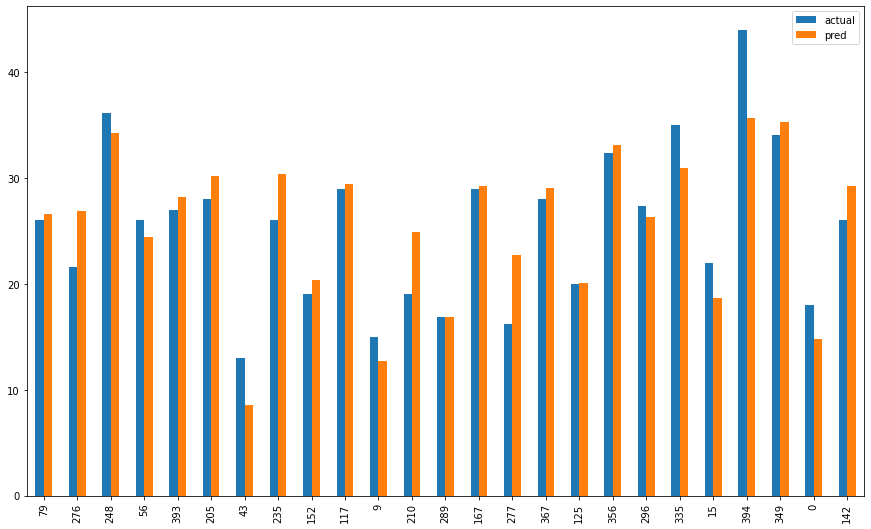

In [98]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

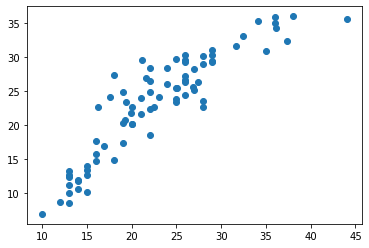

In [84]:
plt.scatter(y_test,y_pred)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [87]:
eval_metric(y_test, y_pred) # TEST SCORE

Model testing performance:
--------------------------
R2_score 	: 0.7922774714022586
MAE 		: 2.4619996980661445
MSE 		: 10.602279011688344
RMSE 		: 3.256114096847398


In [99]:
# underfittig - overfitting - overfitting'e düştüğümüzü nasıl anlarız ? --overfittingin önüne nasıl geçeriz ? 

# linear regresyonun varsayımları nelerdir ? :

In [100]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [102]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


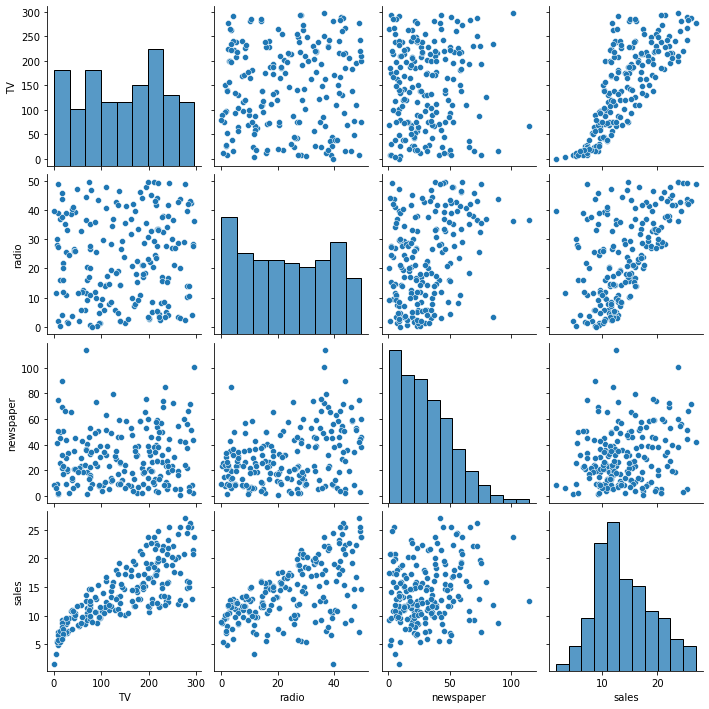

In [103]:
sns.pairplot(df)

           Korelasyon: İki sayısal değişkenin beraber değişme (kovaryans) seviyesinin [-1, 1] skalasına indirgenmiş halidir.
           korelasyonda birlikte değişkenlik gösterseler de birbirlerine etkisi olup olmadığını bilmiyoruz değişkenlerin,    regresyonda ise bu etki etme olayını hesaplıyoruz
           İlk aşamada korelasyon ile ilişki incelemesi yapılır.
           İkinci aşamada aralarında bağımlı ve bağımsız değişkenler belirlenip matematiksel denklem yazılır (regresyon)

In [ ]:
# 1.varsayımımız : doğrusallık:iki değişken arasındaki ilişkiyi bir doğruyla ifade edebilme durumu.

<AxesSubplot:>

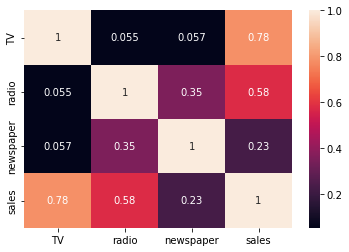

In [104]:
sns.heatmap(df.corr(), annot = True)

### corelasyonları çok düşükmüş deyip atmak saçma olur ;   3 tane corr'u düşük corelasyonu belki ben feature engineriing kapsamında birleştireceğim buna modele soktuktan sonra da karar verebilirim.

In [105]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [107]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [108]:
model = LinearRegression()

In [109]:
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [111]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [112]:
coeff_df = pd.DataFrame(data = model.coef_ ,index=X.columns,columns = ["Coefficient"])
coeff_df

,Coefficient
TV,0.044730
radio,0.189195
newspaper,0.002761


In [113]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [114]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


In [115]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


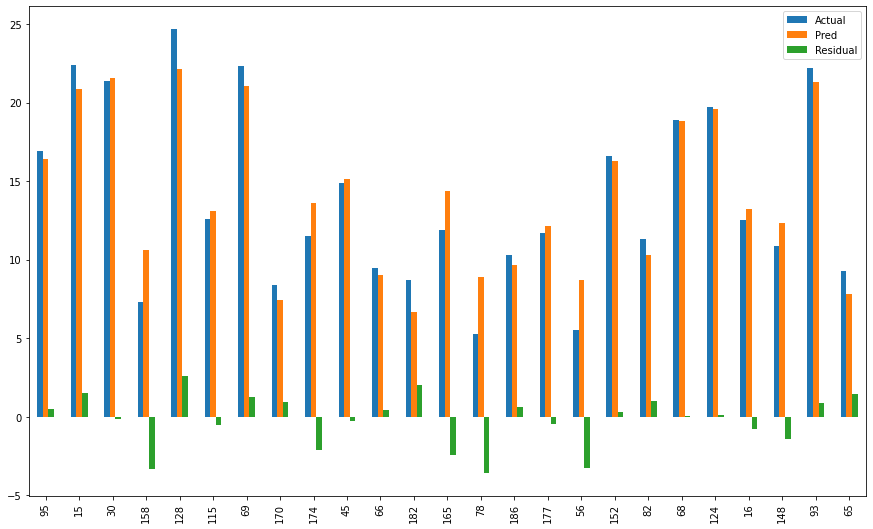

In [116]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [117]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8994380241009121
MAE 		: 1.4607567168117597
MSE 		: 3.1740973539761015
RMSE 		: 1.7815996615334495


In [118]:
y_train_pred = model.predict(X_train)

In [120]:
eval_metric(y_train, y_train_pred)             ## overfitting - underfitting karşılaştırılması.

Model testing performance:
--------------------------
R2_score 	: 0.8957008271017817
MAE 		: 1.1984678961500141
MSE 		: 2.7051294230814147
RMSE 		: 1.6447277656443375


### linear regresyonda 2.varsayımımız : Residuals normal dağılım sergilemesi lazım.

In [122]:
residuals = y_test-y_pred  # error

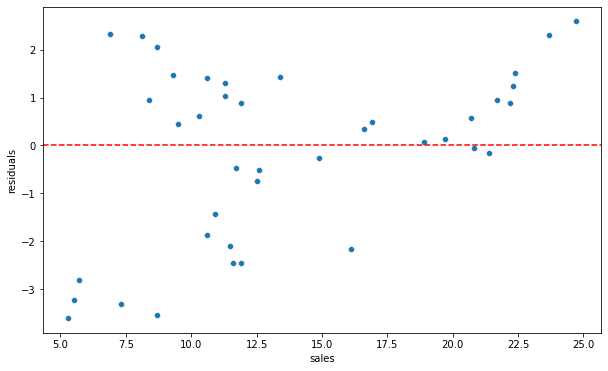

In [123]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [126]:
import scipy.stats as stats

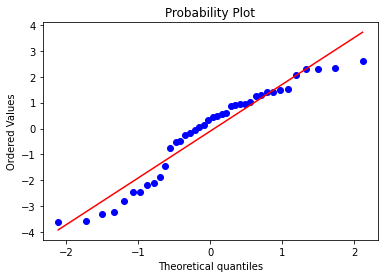

In [127]:
stats.probplot(residuals, dist ="norm", plot =plt); 

## eğer errorlar bu line'ı sarmaşık gibi sarılırsa normal dağılıma sahip errorlarım diyebiliriz. orta hattan ne kadar uzaklaşıyorsa noktalar demek ki dağılım bozuluyor datamıza linear regression çok  da uygun değildir çıkarımı yapabiliriz